In [0]:
# Import libraries

import numpy as np
import pandas as pd
import operator
from collections import defaultdict

from google.colab import drive
drive.mount('/content/drive')

print("Done...")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Done...


In [0]:
# Load data
train_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EDA_data/train.csv')
label_col = list(train_csv['AdoptionSpeed'])
label_set = list(set(label_col))
print(label_set)

[0, 1, 2, 3, 4]



## **Pet name exploration**

In [0]:
# Count unique names and "no name"

name_col = list(train_csv['Name'])
name_count = defaultdict(int)
name_index = defaultdict(list)

for x in range(len(name_col)):
  name = str(name_col[x]).lower()
  if len(name.split()) < 4 and name != 'nan' and 'no name' not in name:
    name_count[name] += 1
    name_index[name].append(x)
  else:
    name_count['No name'] += 1
    name_index['No name'].append(x)
      
name_count_sort = dict(sorted(name_count.items(), key=operator.itemgetter(1))[::-1])
name_count_more_freq = {x:name_count_sort[x] for x in name_count_sort if name_count_sort[x]>2}
del name_count_more_freq['No name']

print("Total have {} unique names.\n{} names appeared at least 3 times.\nFirst 20 unique name counts:\n{}".
      format(len(name_count_sort), len(name_count_more_freq), list(name_count_more_freq.items())[:20]))
print("{} samples have name, {} samples dont't".format(sum(name_count_sort.values())-name_count_sort['No name'], name_count_sort['No name']))

Total have 7387 unique names.
665 names appeared at least 3 times.
First 20 unique name counts:
[('baby', 67), ('lucky', 66), ('mimi', 59), ('brownie', 55), ('blackie', 49), ('puppy', 48), ('coco', 41), ('kitty', 41), ('max', 40), ('kittens', 39), ('oreo', 38), ('milo', 35), ('tiger', 34), ('angel', 34), ('kiki', 32), ('lucy', 31), ('snowy', 30), ('bobby', 30), ('ginger', 29), ('lily', 29)]
12189 samples have name, 2804 samples dont't


In [0]:
# Explore relation between "name"/"no name" and "adoption speed"

have_name_detail = defaultdict(int)
no_name_detail = defaultdict(int)
more_freq_detail = defaultdict(int)
for x in name_index:
  if x == 'No name':
    for y in name_index[x]:
      speed = label_col[y]
      no_name_detail[speed] += 1
  else:
    for y in name_index[x]:
      speed = label_col[y]
      have_name_detail[speed] += 1
      if x in name_count_more_freq:
        more_freq_detail[speed] += 1
        
have_name_amount = sum(have_name_detail.values())
print("Have name:\nTotal:{}".format(have_name_amount))
for x in label_set:
  print("Speed {}: {}({}%)".format(x, have_name_detail[x], round(100*have_name_detail[x]/have_name_amount, 2)))
  
no_name_amount = sum(no_name_detail.values())
print("\nNo name:\nTotal:{}".format(no_name_amount))
for x in label_set:
  print("Speed {}: {}({}%)".format(x, no_name_detail[x], round(100*no_name_detail[x]/no_name_amount, 2)))
  
more_freq_amount = sum(more_freq_detail.values())
print("\nHave name appeared more than 3 times:\nTotal:{}".format(more_freq_amount))
for x in label_set:
  print("Speed {}: {}({}%)".format(x, more_freq_detail[x], round(100*more_freq_detail[x]/more_freq_amount, 2)))

print("\nOverall:\nTotal:{}".format(len(label_col)))
for x in label_set:
  print("Speed {}: {}({}%)".format(x, label_col.count(x), round(100*label_col.count(x)/len(label_col), 2)))

Have name:
Total:12189
Speed 0: 332(2.72%)
Speed 1: 2486(20.4%)
Speed 2: 3336(27.37%)
Speed 3: 2700(22.15%)
Speed 4: 3335(27.36%)

No name:
Total:2804
Speed 0: 78(2.78%)
Speed 1: 604(21.54%)
Speed 2: 701(25.0%)
Speed 3: 559(19.94%)
Speed 4: 862(30.74%)

Have name appeared more than 3 times:
Total:4875
Speed 0: 139(2.85%)
Speed 1: 1000(20.51%)
Speed 2: 1334(27.36%)
Speed 3: 1022(20.96%)
Speed 4: 1380(28.31%)

Overall:
Total:14993
Speed 0: 410(2.73%)
Speed 1: 3090(20.61%)
Speed 2: 4037(26.93%)
Speed 3: 3259(21.74%)
Speed 4: 4197(27.99%)


## **Pet fee exploration**

In [0]:
fee_col = list(train_csv['Fee'])
fee_list = list(set(fee_col))
fee_list.sort()
fee_dict = {x: fee_col.count(x) for x in fee_list}

have_fee_detail = defaultdict(int)
no_fee_detail = defaultdict(int)
have_fee_amount = sum(x>0 for x in fee_col)
no_fee_amount = len(fee_col) - have_fee_amount
fee_index = defaultdict(list)

print("{}({}%) samples have fee".format(have_fee_amount, 100*(round(1-(fee_col.count(0)/len(fee_col)),2))))
print("Have {} unique fee values".format(len(fee_dict)))
print(list(fee_dict.items())[:20])

for x in range(len(fee_col)):
  fee_index[fee_col[x]].append(x)
  if fee_col[x] > 0:
    have_fee_detail[label_col[x]] += 1
  else:
    no_fee_detail[label_col[x]] += 1

print("\nWith Fee:\nTotal:{}".format(have_fee_amount))
for x in label_set:
  print("Speed {}: {}({}%)".format(x, have_fee_detail[x], round(100*have_fee_detail[x]/have_fee_amount, 2))) 
  
print("\nNo Fee:\nTotal:{}".format(no_fee_amount))
for x in label_set:
  print("Speed {}: {}({}%)".format(x, no_fee_detail[x], round(100*no_fee_detail[x]/no_fee_amount, 2))) 

print("\nOverall:\nTotal:{}".format(len(label_col)))
for x in label_set:
  print("Speed {}: {}({}%)".format(x, label_col.count(x), round(100*label_col.count(x)/len(label_col), 2)))
  

2330(16.0%) samples have fee
Have 74 unique fee values
[(0, 12663), (1, 82), (2, 1), (5, 24), (8, 7), (9, 5), (10, 70), (14, 1), (15, 20), (20, 136), (25, 8), (30, 103), (35, 3), (38, 4), (40, 19), (45, 2), (48, 1), (50, 468), (59, 2), (60, 11)]

With Fee:
Total:2330
Speed 0: 53(2.27%)
Speed 1: 479(20.56%)
Speed 2: 607(26.05%)
Speed 3: 470(20.17%)
Speed 4: 721(30.94%)

No Fee:
Total:12663
Speed 0: 357(2.82%)
Speed 1: 2611(20.62%)
Speed 2: 3430(27.09%)
Speed 3: 2789(22.02%)
Speed 4: 3476(27.45%)

Overall:
Total:14993
Speed 0: 410(2.73%)
Speed 1: 3090(20.61%)
Speed 2: 4037(26.93%)
Speed 3: 3259(21.74%)
Speed 4: 4197(27.99%)



Number of price more than 1000: 2



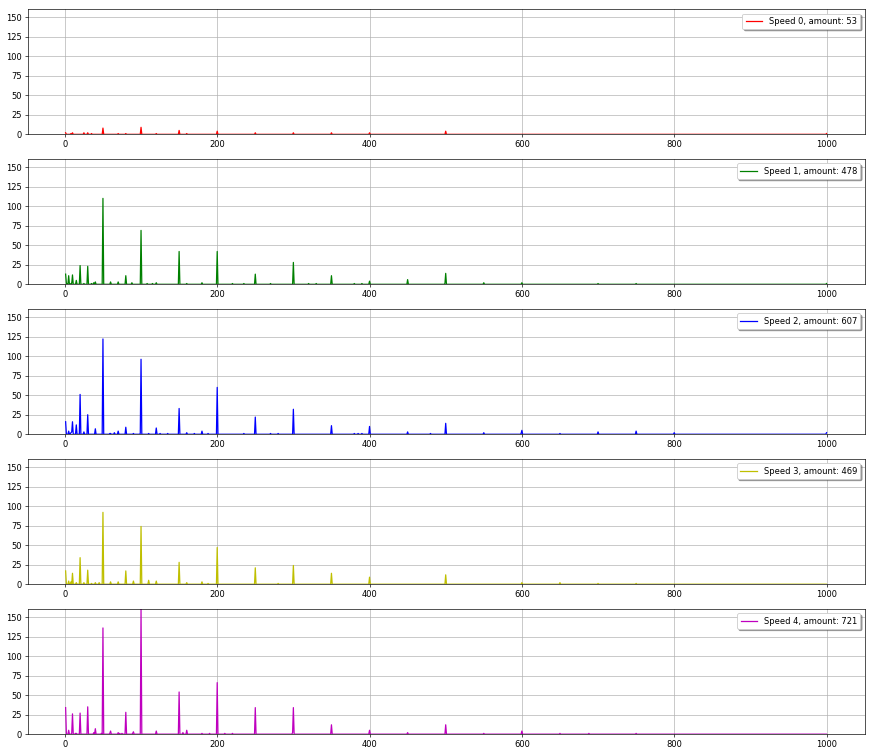

In [0]:
# Plot Speed and count of each fee value
print('\nNumber of price more than 1000: {}\n'.format(sum(x>1000 for x in fee_col)))
fee_dist = defaultdict(list)
for x in range(1001)[1:1001]:
  for y in label_set:
    fee_dist[y].append(0)
  for z in fee_index[x]:
    fee_dist[label_col[z]][x-1] += 1 

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 60, facecolor='w', edgecolor='k')
colors = ['r','g','b','y','m']
plt.figure(1)
for x in range(5):
  sub_num = 510 + x + 1
  plt.subplot(sub_num)
  plt.plot(list(range(1001))[1:1001], fee_dist[x], color=colors[x], label='Speed {}, amount: {}'.format(x, sum(fee_dist[x])))
  plt.ylim(0,160)
  plt.legend(loc='best', frameon=True, shadow=True)
  plt.grid(True)

plt.show()

## **Pet breed exploration**

In [0]:
# Baisc information of bread for dog and cat
type_col = list(train_csv['Type'])
breed_label_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EDA_data/breed_labels.csv')
breed1_col = list(train_csv['Breed1'])
breed2_col = list(train_csv['Breed2'])
breed_label_dog = {breed_label_csv['BreedID'][x]: breed_label_csv['BreedName'][x] for x in range(len(breed_label_csv['BreedID'])) if breed_label_csv['Type'][x]==1}
breed_label_cat = {breed_label_csv['BreedID'][x]: breed_label_csv['BreedName'][x] for x in range(len(breed_label_csv['BreedID'])) if breed_label_csv['Type'][x]==2}

print("Total have {} dogs and {} cats\n".format(type_col.count(1), type_col.count(2)))
print("Dog have {} unique breeds\n".format(len(breed_label_dog)))
print("Cat have {} unique breeds\n".format(len(breed_label_cat)))
print("{} samples have breed2, {} of them are not equal to breed1\n"
      .format(sum(x>0 for x in breed2_col), sum(breed2_col[y]!=breed1_col[y] for y in range(len(breed2_col)) if breed2_col[y]>0)))

Total have 8132 dogs and 6861 cats

Dog have 241 unique breeds

Cat have 66 unique breeds

4231 samples have breed2, 2721 of them are not equal to breed1



In [0]:
# Check distribution of breed1
breed1_dog_detail = defaultdict(int)
breed1_cat_detail = defaultdict(int)
wrong_pair = []
for x in range(len(breed1_col)):
  breed = breed1_col[x]
  if type_col[x] == 1 and breed in breed_label_dog:
    breed1_dog_detail[breed_label_dog[breed]] += 1
  elif type_col[x] == 2 and breed in breed_label_cat:
    breed1_cat_detail[breed_label_cat[breed]] += 1
  else:
    wrong_pair.append(x)
breed1_dog_detail = dict(sorted(breed1_dog_detail.items(), key=operator.itemgetter(1))[::-1])
breed1_cat_detail = dict(sorted(breed1_cat_detail.items(), key=operator.itemgetter(1))[::-1])
print('Dog breed1 count:\n{}\n'.format(breed1_dog_detail))
print('Cat breed1 count:\n{}\n'.format(breed1_cat_detail))
print('Wrong pair (index, breed1, type):\n{}\n'.format([(x, breed1_col[x], type_col[x]) for x in wrong_pair]))

Dog breed1 count:
{'Mixed Breed': 5923, 'Labrador Retriever': 205, 'Shih Tzu': 189, 'Poodle': 167, 'Terrier': 161, 'Golden Retriever': 151, 'German Shepherd Dog': 98, 'Beagle': 90, 'Spitz': 89, 'Rottweiler': 88, 'Schnauzer': 69, 'Miniature Pinscher': 67, 'Jack Russell Terrier': 64, 'Doberman Pinscher': 62, 'Cocker Spaniel': 41, 'Dalmatian': 39, 'Chihuahua': 37, 'Husky': 37, 'Dachshund': 28, 'Border Collie': 26, 'Belgian Shepherd Malinois': 26, 'Siberian Husky': 25, 'Silky Terrier': 24, 'Pit Bull Terrier': 23, 'Pomeranian': 22, 'Pug': 21, 'Maltese': 19, 'Pekingese': 18, 'Bull Terrier': 16, 'Corgi': 15, 'Shar Pei': 15, 'Bullmastiff': 12, 'Yellow Labrador Retriever': 12, 'Hound': 11, 'Collie': 11, 'Boxer': 10, 'Basset Hound': 9, 'English Cocker Spaniel': 9, 'Australian Kelpie': 8, 'Black Labrador Retriever': 8, 'West Highland White Terrier Westie': 7, 'Basenji': 6, 'Australian Terrier': 6, 'Great Dane': 6, 'German Pinscher': 6, 'Shepherd': 6, 'Saint Bernard': 5, 'Boston Terrier': 5, 'York